### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Any missing values?
# Create a new DataFrame and use the isna() function to find missing values.
reviews_na = reviews[reviews.isna().any(axis=1)]

# View the shape of the DataFrame.
reviews_na.shape


(0, 11)

In [4]:
#View the crows with missing values
reviews_na


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary


In [5]:
# Explore the data.
# Determine the metadata of the data set.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [6]:
#View the number of unique values in each column
print(reviews.nunique())

gender                       2
age                         45
remuneration (k£)           64
spending_score (1-100)      84
loyalty_points             627
education                    5
language                     1
platform                     1
product                    200
review                    1980
summary                   1432
dtype: int64


In [7]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [8]:
# Drop unnecessary columns.
# Use dropped.drop to remove irrelevant columns from the DataFrame. 
# Specify that language and platform are columns (i.e. axis 1). 
r1 = reviews.drop(['language', 'platform'], axis=1) 

# View column names.
r1.head()


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [9]:
# Rename the column headers.
new_columns = {
    'remuneration (k£)': 'remuneration',
    'spending_score (1-100)': 'spending_score',
}

# Use the rename method to rename columns
r1.rename(columns=new_columns, inplace=True)


# View column names.
print(r1)


      gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0      

## 4. Save the DataFrame as a CSV file

In [10]:
# Create a CSV file as output.

# Specify the path and file name for your CSV file
output_path = 'r1.csv'

# Use the to_csv method to save the DataFrame to a CSV file
r1.to_csv(output_path, index=False)

In [11]:
# Import new CSV file with Pandas.
r1 = pd.read_csv('r1.csv')

# View DataFrame.
r1.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

In [12]:
# Independent variable.
X = r1['spending_score'] 

# Dependent variable.
Y = r1['loyalty_points']  

# OLS model and summary.
# Create the OLS model
model = sm.OLS(Y, X)

# Fit the model
results = model.fit()

In [13]:
# Extract the estimated parameters.
params = results.params

# Extract the standard errors.
std_errors = results.bse  

# Extract the predicted values.
predicted_values = results.predict(X)

In [14]:
# Set the X coefficient and the constant to generate the regression table.
X = sm.add_constant(X)

# View the output.
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:         loyalty_points   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                              7156.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        10:58:22   Log-Likelihood:                         -16552.
No. Observations:                2000   AIC:                                  3.311e+04
Df Residuals:                    1999   BIC:                                  3.311e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

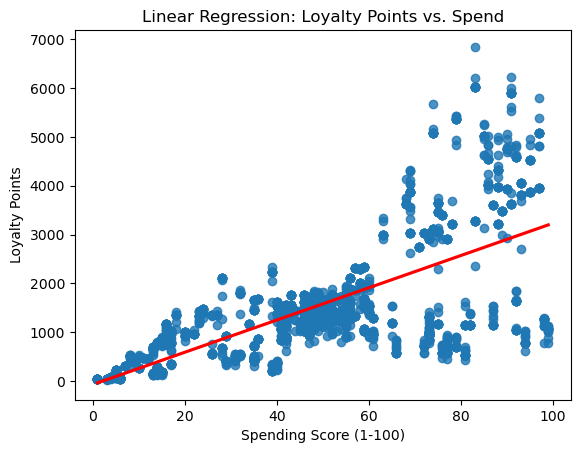

In [15]:
# Plot the graph with a regression line.
sns.regplot(x='spending_score', y='loyalty_points', data=r1, ci=None, line_kws={"color": "red"})
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Loyalty Points')
plt.title('Linear Regression: Loyalty Points vs. Spend')
plt.show()

### 5b) remuneration vs loyalty

In [16]:
# Independent variable.
X = r1['remuneration'] 

# Dependent variable.
Y = r1['loyalty_points']  

# OLS model and summary.
# Create the OLS model
model = sm.OLS(Y, X)

# Fit the model
results = model.fit()

In [17]:
# Extract the estimated parameters.
params = results.params

# Extract the standard errors.
std_errors = results.bse  

# Extract the predicted values.
predicted_values = results.predict(X)

In [18]:
# Set the X coefficient and the constant to generate the regression table.
X = sm.add_constant(X)

# View the output.
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:         loyalty_points   R-squared (uncentered):                   0.753
Model:                            OLS   Adj. R-squared (uncentered):              0.753
Method:                 Least Squares   F-statistic:                              6091.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        10:58:23   Log-Likelihood:                         -16675.
No. Observations:                2000   AIC:                                  3.335e+04
Df Residuals:                    1999   BIC:                                  3.336e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

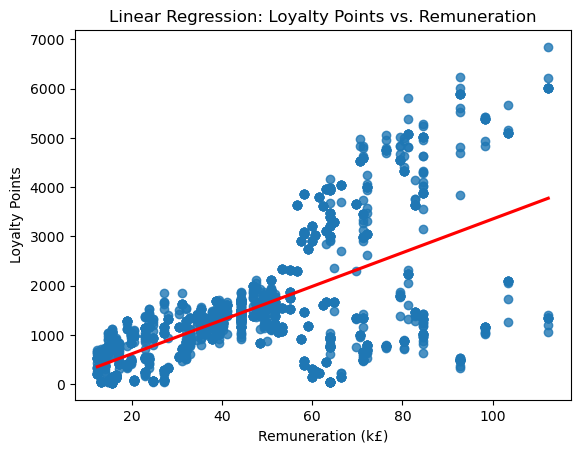

In [19]:
# Plot graph with regression line.
sns.regplot(x='remuneration', y='loyalty_points', data=r1, ci=None, line_kws={"color": "red"})
plt.xlabel('Remuneration (k£)')
plt.ylabel('Loyalty Points')
plt.title('Linear Regression: Loyalty Points vs. Remuneration')
plt.show()

### 5c) age vs loyalty

In [20]:
# Independent variable.
X = r1['age'] 

# Dependent variable.
Y = r1['loyalty_points']  

# OLS model and summary.
# Create the OLS model
model = sm.OLS(Y, X)

# Fit the model
results = model.fit()

In [21]:
# Extract the estimated parameters.
params = results.params

# Extract the standard errors.
std_errors = results.bse  

# Extract the predicted values.
predicted_values = results.predict(X)

In [22]:
# Set the X coefficient and the constant to generate the regression table.
X = sm.add_constant(X)

# View the output.
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:         loyalty_points   R-squared (uncentered):                   0.526
Model:                            OLS   Adj. R-squared (uncentered):              0.526
Method:                 Least Squares   F-statistic:                              2217.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        10:58:24   Log-Likelihood:                         -17327.
No. Observations:                2000   AIC:                                  3.466e+04
Df Residuals:                    1999   BIC:                                  3.466e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

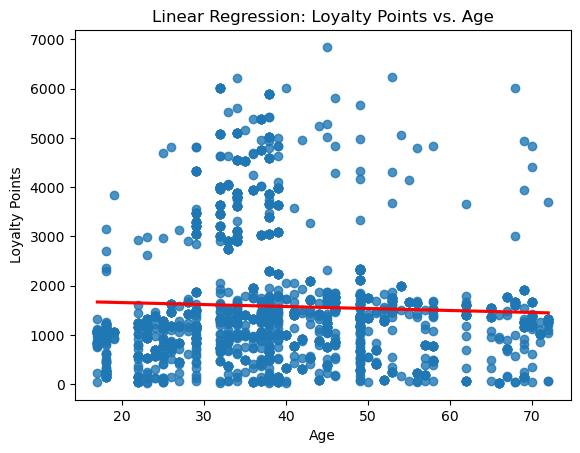

In [23]:
# Plot graph with regression line.
sns.regplot(x='age', y='loyalty_points', data=r1, ci=None, line_kws={"color": "red"})
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.title('Linear Regression: Loyalty Points vs. Age')
plt.show()

## 6. Observations and insights

***Your observations here...***






From the models above, it suggests that there is a correlation between loyalty points and the independant variables of spend, remuneration and age. After viewing the R-squared values and the graphs, we can see that spend and remuneration have stronger positive correlation relationship with loyalty, whereas age is not as significant.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [24]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [25]:
# Load the CSV file(s) as r2.
r2 = pd.read_csv('r1.csv')

# View the DataFrame.
r2.info()
r2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [26]:
# Drop unnecessary columns.
r2 = reviews.drop(['language', 'platform'], axis=1) 

# Rename the column headers.
new_columns = {
    'remuneration (k£)': 'remuneration',
    'spending_score (1-100)': 'spending_score',
}

# Use the rename method to rename columns
r2.rename(columns=new_columns, inplace=True)

# View column names.
r2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [27]:
# Explore the data.
# Determine the metadata of the data set.
r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [28]:
#View the number of unique values in each column
print(reviews.nunique())

gender                       2
age                         45
remuneration (k£)           64
spending_score (1-100)      84
loyalty_points             627
education                    5
language                     1
platform                     1
product                    200
review                    1980
summary                   1432
dtype: int64


In [29]:
# Descriptive statistics.
r2.describe()

,age,remuneration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Plot

<Axes: xlabel='remuneration', ylabel='spending_score'>

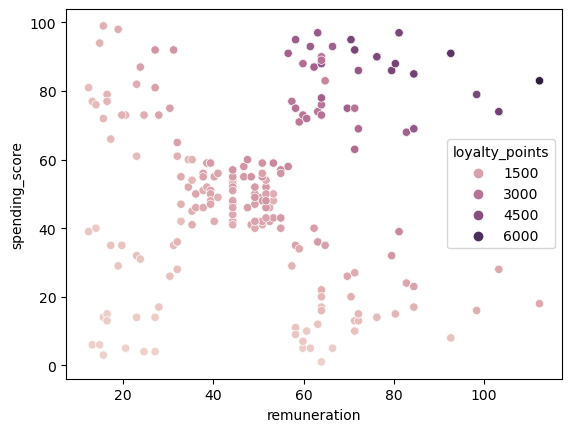

In [30]:
# Create a scatterplot of remuneration vs spending with Seaborn.
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=r2,
                hue='loyalty_points')

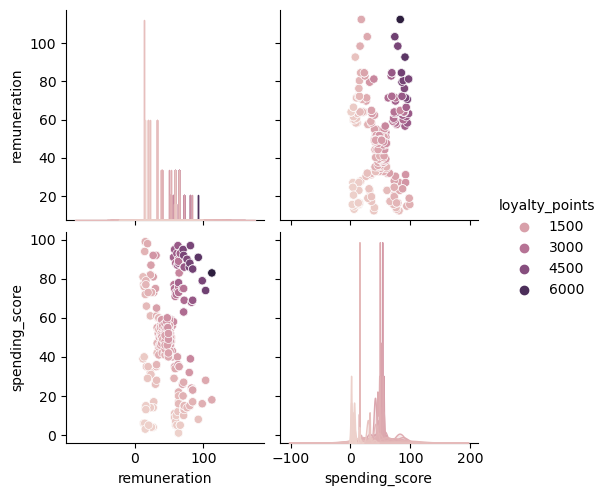

In [31]:
# Create a pairplot with Seaborn.
x = r2[['remuneration', 'spending_score']]

sns.pairplot(r2,
             vars=x,
             hue='loyalty_points',
             diag_kind='kde')

## 3. Elbow and silhoutte methods

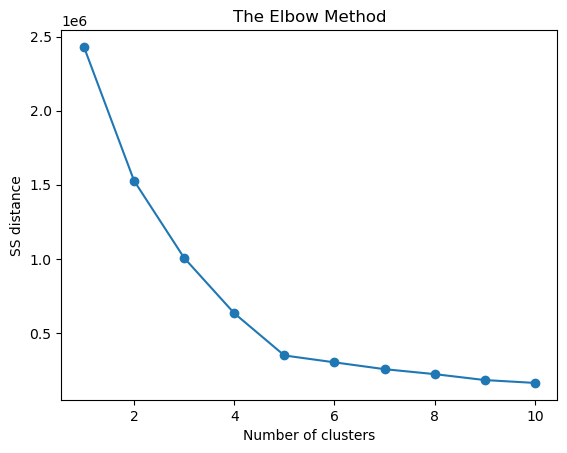

In [32]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

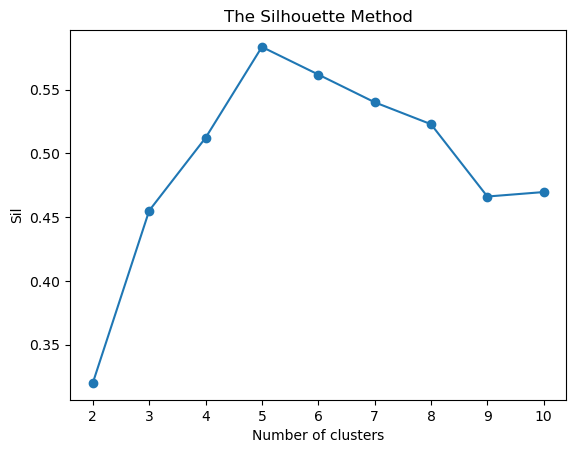

In [33]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

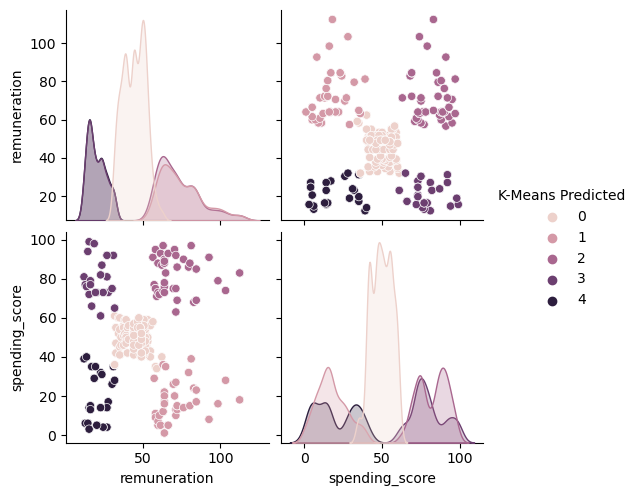

In [34]:
#Five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 2000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

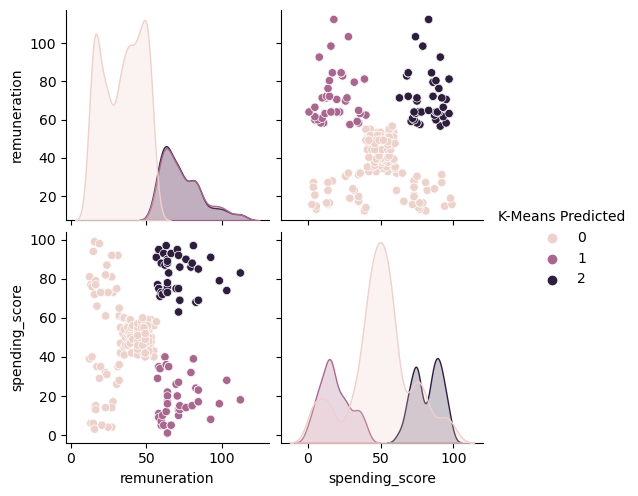

In [35]:
# Three clusters.
kmeans = KMeans(n_clusters = 3, 
                max_iter = 2000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

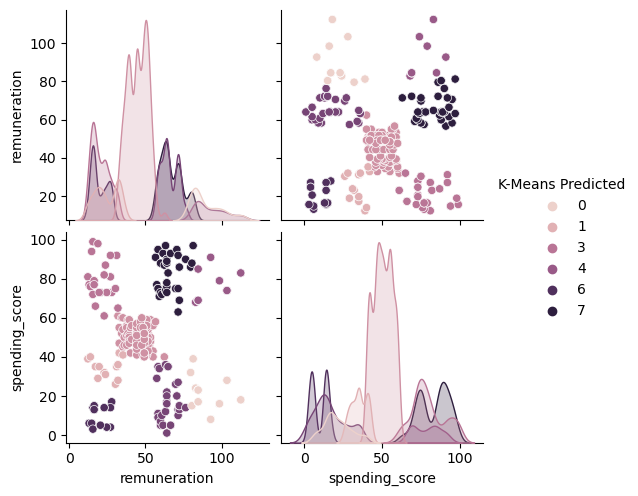

In [36]:
#Eight clusters.
kmeans = KMeans(n_clusters = 8, 
                max_iter = 2000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

## 5. Fit final model and justify your choice

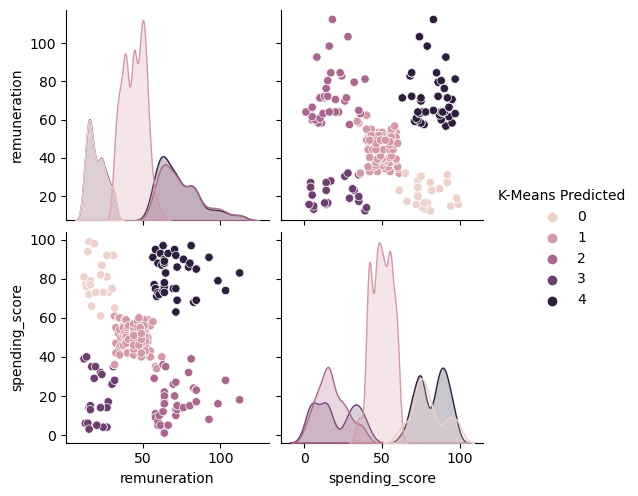

In [37]:
# Apply the final model.
# Based on the Elbow and Silhouette model and the graphs, we recommend using five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 2000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')


In [38]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    774
4    356
2    330
3    271
0    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

<Axes: xlabel='remuneration', ylabel='spending_score'>

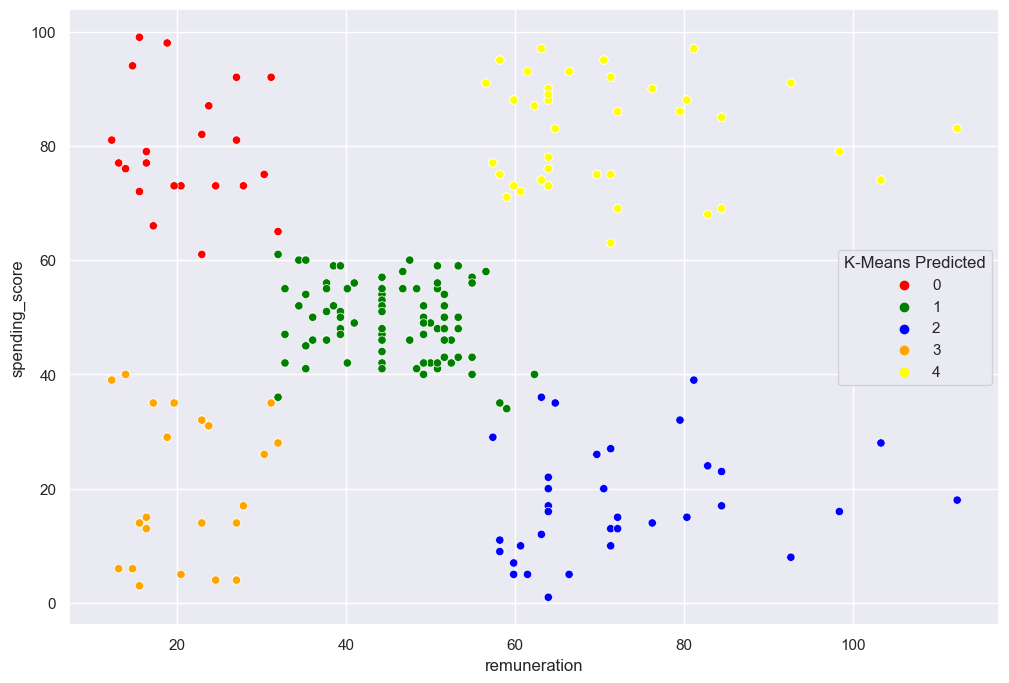

In [39]:
# Visualising the clusters.

# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'orange','yellow']
                         )

# View the DataFrame.


## 7. Discuss: Insights and observations

***Your observations here...***

It seems that `k=5` (five clusters) might give the best results (groups) as it provides the right level to show distinct clusters.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [40]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

!pip install wordcloud
!pip install textblob

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

You should consider upgrading via the '/Users/suyuenho/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/suyuenho/anaconda3/bin/python -m pip install --upgrade pip' command.


In [41]:
# Load the data set as r3.
r3 = pd.read_csv('r1.csv')

# View the DataFrame.
r3.head()


,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [42]:
# Check the data types of columns
r3_data_type = r3.dtypes

# Display the data types
print(r3_data_type)

gender             object
age                 int64
remuneration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [43]:
# Review: Change all to lower case and join with a space

# Change to lower case
r3['review'] = r3['review'].str.lower()


# Joining text elements with a space
r3['review'] = r3['review'].apply(''.join)

In [44]:
# Summary: Change all to lower case and join with a space.

# Change to lower case
r3['summary'] = r3['summary'].str.lower()

# Joining text elements with a space
r3['summary'] = r3['summary'].apply(''.join)

In [45]:
# Display the updated DataFrame
print(r3.head())

   gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  when it comes to a dm's screen, the space on t...   
1      466  an open letter to galeforce9*:\n\nyour unpaint...   
2      254  nice art, nice printing.  why two panels are f...   
3      263  amazing buy! bought it as a gift for our new d...   
4      291  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [46]:
import pandas as pd
import string  
# Replace all the punctuations in review column.
r3['review'] = r3['review'].str.replace(f"[{string.punctuation}]", "")

# View output.
print(r3.head())

   gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  when it comes to a dms screen the space on the...   
1      466  an open letter to galeforce9\n\nyour unpainted...   
2      254  nice art nice printing  why two panels are fil...   
3      263  amazing buy bought it as a gift for our new dm...   
4      291  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  

In [47]:
# Replace all the puncuations in summary column.
r3['summary'] =r3['summary'].str.replace(f"[{string.punctuation}]", "")

# View output.
print(r3.head())

   gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  when it comes to a dms screen the space on the...   
1      466  an open letter to galeforce9\n\nyour unpainted...   
2      254  nice art nice printing  why two panels are fil...   
3      263  amazing buy bought it as a gift for our new dm...   
4      291  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  

### 2c) Drop duplicates in both columns

In [48]:
# Drop duplicates in both columns.
r4 = r3.drop_duplicates(subset=['review', 'summary'])

# View DataFrame.
print(r4.head())

   gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  when it comes to a dms screen the space on the...   
1      466  an open letter to galeforce9\n\nyour unpainted...   
2      254  nice art nice printing  why two panels are fil...   
3      263  amazing buy bought it as a gift for our new dm...   
4      291  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  

## 3. Tokenise and create wordclouds

In [49]:
# Create new DataFrame (copy DataFrame).
r4_copy = r4.copy()

# View DataFrame.
r4_copy.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,Male,23,12.30,81,524,graduate,466,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,Female,22,13.12,6,40,graduate,254,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,Female,25,13.12,77,562,graduate,263,amazing buy bought it as a gift for our new dm...,five stars
4,Female,33,13.94,40,366,graduate,291,as my review of gf9s previous screens these we...,money trap


In [50]:
# Apply tokenisation to both columns.
# Define a tokenizer function
def tokenize_text(text):
    return word_tokenize(text)

# Tokenize the 'review' and 'summary' columns
r4_copy['review'] = r4_copy['review'].apply(tokenize_text)
r4_copy['summary'] = r4_copy['summary'].apply(tokenize_text)

# View DataFrame.
r4_copy.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,Male,23,12.30,81,524,graduate,466,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,Female,22,13.12,6,40,graduate,254,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,Female,25,13.12,77,562,graduate,263,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,Female,33,13.94,40,366,graduate,291,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [51]:
# Review: Create a word cloud.

# Flatten the list of lists into a single list of tokens
all_tokens = [token for sublist in r4_copy['review'] for token in sublist]

#Join the tokens into a single string for word cloud
text_for_wordcloud_review = ' '.join(all_tokens)

#Create a word cloud
wordcloud_review = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud_review)

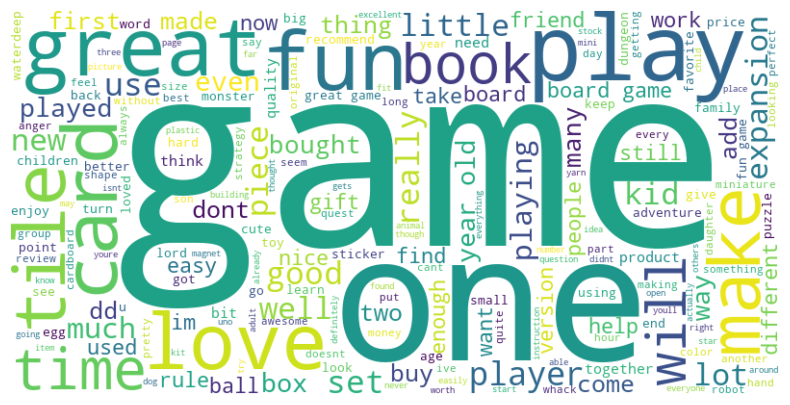

In [52]:
# Review: Plot the WordCloud image.
# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_review, interpolation='bilinear')
plt.axis('off')
plt.show()

In [53]:
# Summary: Create a word cloud.

# Flatten the list of lists into a single list of tokens
all_tokens = [token for sublist in r4_copy['summary'] for token in sublist]

#Join the tokens into a single string for word cloud
text_for_wordcloud_summary = ' '.join(all_tokens)


#Create a word cloud
wordcloud_summary = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud_summary)

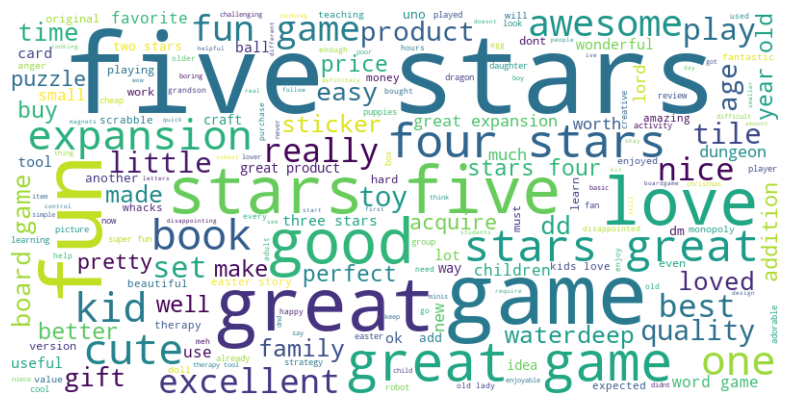

In [54]:
# Summary: Plot the WordCloud image.
# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_summary, interpolation='bilinear')
plt.axis('off')
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [55]:
# Determine the frequency distribution.
# View the frequency distribution.
fdist1 = FreqDist(all_tokens)

# Preview the data.
fdist1

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords 

In [56]:
#Remove alphanumeric characters and punctuation
import string

# Function to remove punctuation and alphanumeric characters from a list of words
def remove_punctuation_and_alphanumeric(words):
    return [''.join(char for char in word if char.isalpha()) for word in words]

# Apply the updated function to 'review' and 'summary' columns
r4_copy['review'] = r4_copy['review'].apply(remove_punctuation_and_alphanumeric)
r4_copy['summary'] = r4_copy['summary'].apply(remove_punctuation_and_alphanumeric)

# Display the updated DataFrame
print(r4_copy.head())

   gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  [when, it, comes, to, a, dms, screen, the, spa...   
1      466  [an, open, letter, to, galeforce, your, unpain...   
2      254  [nice, art, nice, printing, why, two, panels, ...   
3      263  [amazing, buy, bought, it, as, a, gift, for, o...   
4      291  [as, my, review, of, gfs, previous, screens, t...   

                                             summary  
0  [the, fact, that, , of, this, space, is, waste...  
1  [another, worthless, dungeon, masters, screen,...  

In [57]:
# Remove all the stopwords
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')

# Function to remove stopwords from a list of words
def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))
    return [word for word in words if word.lower() not in stop_words]


# Apply the function to 'review' and 'summary' columns
r4_copy['review'] = r4_copy['review'].apply(remove_stopwords)
r4_copy['summary'] = r4_copy['summary'].apply(remove_stopwords)

# Display the updated DataFrame
print(r4_copy.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/suyuenho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  [comes, dms, screen, space, screen, absolute, ...   
1      466  [open, letter, galeforce, unpainted, miniature...   
2      254  [nice, art, nice, printing, two, panels, fille...   
3      263     [amazing, buy, bought, gift, new, dm, perfect]   
4      291  [review, gfs, previous, screens, completely, u...   

                                             summary  
0  [fact, , space, wasted, art, terribly, informa...  
1  [another, worthless, dungeon, masters, screen,...  

### 4c) Create wordcloud without stopwords

In [58]:
# Create a wordcloud without stop words.
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')

# Function to generate and display a word cloud for a specific column
def create_wordcloud(column_name):
    all_words = r4_copy[column_name].explode().astype(str).tolist()
    text = ' '.join(all_words)
    
    # Create WordCloud object with formatting options
    wordcloud = WordCloud(
        stopwords=set(stopwords.words('english')),
        background_color='white',
        colormap='viridis', 
        max_words=200,
        width=800,
        height=400,
        max_font_size=80
    ).generate(text)

    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {column_name}')
    plt.show()


You should consider upgrading via the '/Users/suyuenho/anaconda3/bin/python -m pip install --upgrade pip' command.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/suyuenho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


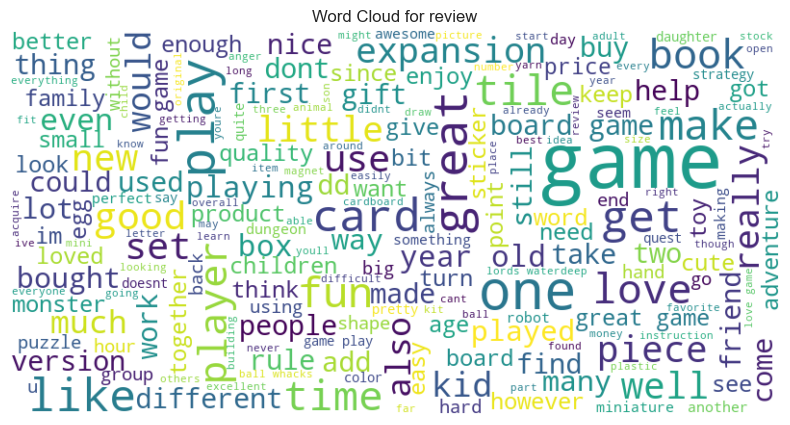

In [59]:
# WordCloud for review
create_wordcloud('review')

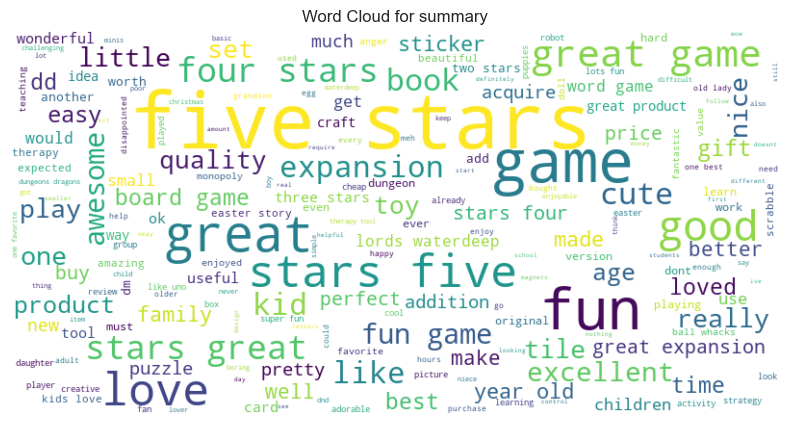

In [60]:
# WordCloud for summary
create_wordcloud('summary')

### 4d) Identify 15 most common words and polarity

In [61]:
# Determine the 15 most common words.
# Function to identify and print the top 15 most common words
def get_top_words(column_name):
    all_words = r4_copy[column_name].explode().astype(str).tolist()
    
    # Get word frequencies
    word_frequencies = Counter(all_words)
    
    # Return the top 15 most common words
    top_words = word_frequencies.most_common(15)
    
    # Print the top 15 words
    print(f"Top 15 words in '{column_name}' column:")
    for word, frequency in top_words:
        print(f"{word}: {frequency}")

# Identify and print the top 15 most common words for 'review' and 'summary' columns
get_top_words('review')
get_top_words('summary')

Top 15 words in 'review' column:
game: 1671
: 1044
great: 580
fun: 552
one: 530
play: 502
like: 414
love: 323
really: 319
get: 319
cards: 301
tiles: 297
time: 291
good: 289
would: 280
Top 15 words in 'summary' column:
stars: 427
five: 342
game: 319
great: 295
fun: 218
love: 93
good: 92
four: 58
like: 54
: 53
expansion: 52
kids: 50
cute: 45
book: 43
one: 38


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [63]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [65]:
# Determine polarity of both columns. 

# Convert lists to strings in 'review' and 'summary' columns
r4_copy['review'] = r4_copy['review'].apply(lambda x: ' '.join(x))
r4_copy['summary'] = r4_copy['summary'].apply(lambda x: ' '.join(x))

# Apply the generate_polarity function to 'review' and 'summary' columns
r4_copy['review_polarity'] = r4_copy['review'].apply(generate_polarity)
r4_copy['summary_polarity'] = r4_copy['summary'].apply(generate_polarity)

# View output.
print("Review Polarity:")
print(r4_copy['review_polarity'].head())

print("\nSummary Polarity:")
print(r4_copy['summary_polarity'].head())


Review Polarity:
0   -0.242857
1   -0.019468
2    0.118243
3    0.578788
4   -0.316667
Name: review_polarity, dtype: float64

Summary Polarity:
0   -0.6
1   -0.8
2    0.0
3    0.0
4    0.0
Name: summary_polarity, dtype: float64


In [74]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Apply the generate_subjectivity function to 'review' and 'summary' columns
r4_copy['review_subjectivity'] = r4_copy['review'].apply(generate_subjectivity)
r4_copy['summary_subjectivity'] = r4_copy['summary'].apply(generate_subjectivity)

# View output
print("Review Subjectivity:")
print(r4_copy['review_polarity'].head())

print("Summary Subjectivity:")
print(r4_copy['summary_subjectivity'].head())

Review Subjectivity:
0   -0.242857
1   -0.019468
2    0.118243
3    0.578788
4   -0.316667
Name: review_polarity, dtype: float64
Summary Subjectivity:
0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: summary_subjectivity, dtype: float64


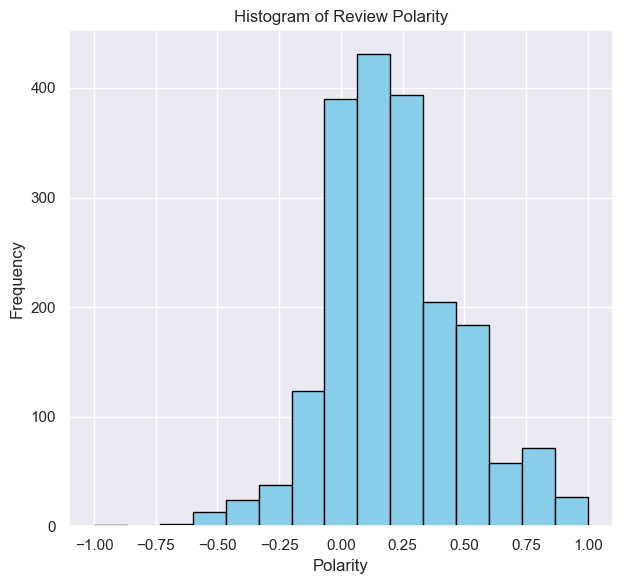

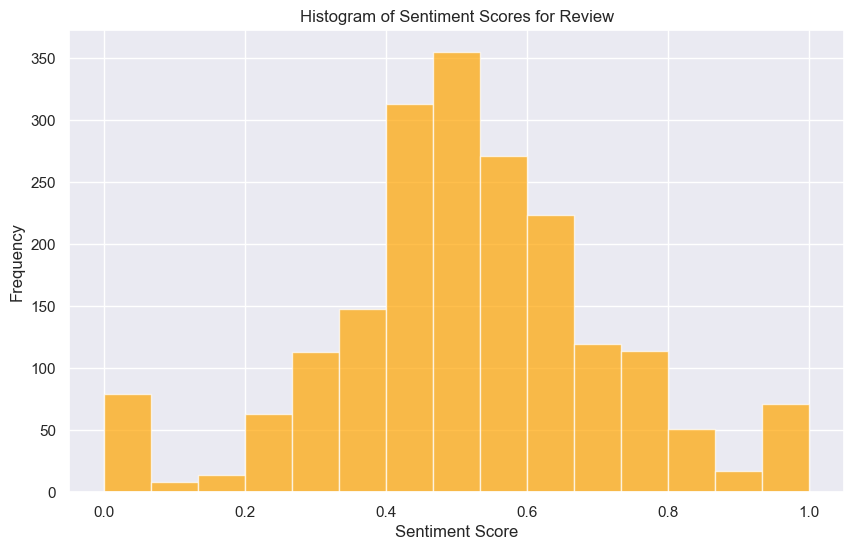

In [75]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
import matplotlib.pyplot as plt

# Apply the generate_polarity function to review column
r4_copy['review_polarity'] = r4_copy['review'].apply(generate_polarity)

# Plot histogram for review  polarity scores
plt.figure(figsize=(12, 6))

# Histogram for 'review' polarity
plt.subplot(1, 2, 1)
plt.hist(r4_copy['review_polarity'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Review Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Histogram of sentiment score
plt.figure(figsize=(10, 6))
plt.hist(r4_copy['review_subjectivity'], bins=15, color='orange', alpha=0.7)
plt.title('Histogram of Sentiment Scores for Review')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

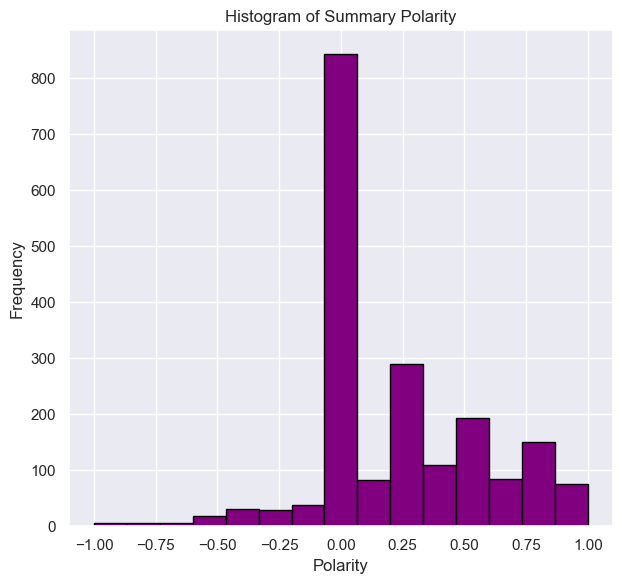

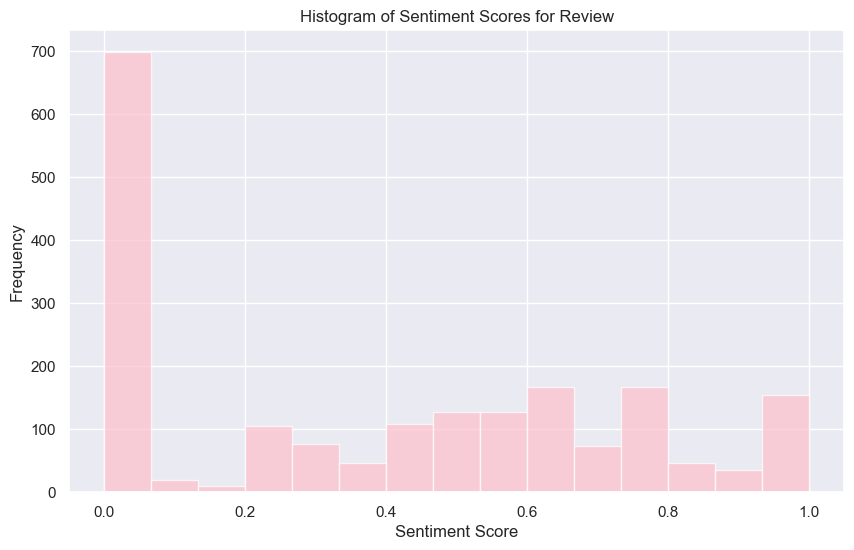

In [76]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity

# Apply the generate_polarity function to summary column

r4_copy['summary_polarity'] = r4_copy['summary'].apply(generate_polarity)

# Plot histogram for summary polarity scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.hist(r4_copy['summary_polarity'], bins=15, color='purple', edgecolor='black')
plt.title('Histogram of Summary Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Histogram of sentiment score
plt.figure(figsize=(10, 6))
plt.hist(r4_copy['summary_subjectivity'], bins=15, color='pink', alpha=0.7)
plt.title('Histogram of Sentiment Scores for Review')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [80]:
# Top 20 negative reviews.
# Create a new DataFrame.
negative_review = r4_copy.nsmallest(20, 'review_polarity')

# Keep the relevant columns.
negative_review = negative_review[['product', 'review', 'review_polarity', 'review_subjectivity']]

# View output.
negative_review.style.set_properties(subset=['review'], **{'width': '1200px'})

,product,review,review_polarity,review_subjectivity
208,1459,booo unles patient know measure didnt patience neither daughter boring unless craft person,-1.000000,1.000000
526,2849,keeps clients engaged helping develop anger management skills criticism wish cards questions,-0.700000,0.200000
174,5758,sent product granddaughter pompom maker comes two parts supposed snap together create pompoms however parts making unusable cant make pompoms kit useless since sent gift return disappointed,-0.625000,0.475000
182,6504,incomplete kit disappointing,-0.600000,0.700000
538,10281,purchased recommendation two therapists working adopted children children found boring put half way,-0.583333,0.583333
1804,2253,im sorry find product boring frank juvenile,-0.583333,0.750000
364,11056,one staff using game soon dont know well works yet looking cards believe helpful getting conversation started regarding anger control,-0.550000,0.300000
117,2387,bought christmas gift grandson sticker book go wrong gift,-0.500000,0.900000
173,5740,horrible nothing say would give zero stars possible,-0.500000,1.000000
227,231,gift daughter found difficult use,-0.500000,1.000000


In [82]:
# Top 20 negative summaries.
# Create a new DataFrame.
negative_summary = r4_copy.nsmallest(20, 'summary_polarity')

# Keep the relevant columns.
negative_summary = negative_summary[['product', 'summary', 'summary_polarity', 'summary_subjectivity']]

# View output.
negative_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})

,product,summary,summary_polarity,summary_subjectivity
21,1241,worst value ive ever seen,-1.000000,1.000000
173,5740,horrible nothing say would give zero stars,-1.000000,1.000000
208,1459,boring unless craft person,-1.000000,1.000000
829,2793,boring,-1.000000,1.000000
1166,6431,hated running rpg campaign dealing towns,-0.900000,0.700000
1,466,another worthless dungeon masters screen galeforce,-0.800000,0.900000
144,2807,disappointed,-0.750000,0.750000
631,1945,disappointed,-0.750000,0.750000
793,4047,disappointed,-0.750000,0.750000
1620,3967,disappointed,-0.750000,0.750000


In [83]:
# Top 20 positive reviews.
# Create a new DataFrame.
positive_review = r4_copy.nlargest(20, 'review_polarity')

# Keep the relevant columns.
positive_review = positive_review[['product', 'review', 'review_polarity', 'review_subjectivity']]

# View output.
positive_review.style.set_properties(subset=['review'], **{'width': '1200px'})



,product,review,review_polarity,review_subjectivity
7,1012,came perfect condition,1.000000,1.000000
165,11056,awesome book,1.000000,1.000000
194,9080,awesome gift,1.000000,1.000000
496,3427,excellent activity teaching selfmanagement skills,1.000000,1.000000
524,8235,perfect ordered,1.000000,1.000000
591,8962,wonderful product,1.000000,1.000000
609,1501,delightful product,1.000000,1.000000
621,618,wonderful grandson learn resurrection story,1.000000,1.000000
790,9080,perfect,1.000000,1.000000
933,4477,awesome,1.000000,1.000000


In [86]:
# Top 20 positive summaries.
# Create a new DataFrame.
positive_summary = r4_copy.nlargest(20, 'summary_polarity')

# Keep the relevant columns.
positive_summary = positive_summary[['product', 'summary', 'summary_polarity', 'summary_subjectivity']]

# View output.
positive_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})

,product,summary,summary_polarity,summary_subjectivity
6,979,best gm screen ever,1.000000,0.300000
28,231,wonderful designs,1.000000,1.000000
32,2253,perfect,1.000000,1.000000
80,1618,theyre perfect size keep car diaper,1.000000,1.000000
134,10196,perfect preschooler,1.000000,1.000000
140,4470,awesome sticker activity price,1.000000,1.000000
161,10995,awesome book,1.000000,1.000000
187,4405,awesome,1.000000,1.000000
210,1473,awesome welldesigned year olds,1.000000,1.000000
418,1183,perfect,1.000000,1.000000


## 7. Discuss: Insights and observations

***Your observations here...***

Based on the histograms displaying the polarity and sentiment scores, it suggests that customers are generally neutral on the product, though the analysis of reviews skew slightly more positive. 

However, the process of preparing the data for NLP could have resulted in somre reviews losing the context of their reviews which gives a inaccurate polarity and sentiment score; e.g. one of the Top 20 negative reviews returned seems to actually be a positive review, however due to the presence of certain words meant that it was scored as negative (keeps clients engaged helping develop anger management skills criticism wish cards questions')

In this data set, customer sentiment could be mapped in relation to certain products. We could identify the products that require improvement, or conversely the best-reviewed, by the quantity and severity of comments. 

# 